In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [2]:
df1_train = pd.read_csv(r'C:\Users\jaraneses\OneDrive - 2X LLC\Codes\Portfolio Projects_storage\Day 22 - Big Mart Sales Prediction\Train.csv')
df2_test = pd.read_csv(r'C:\Users\jaraneses\OneDrive - 2X LLC\Codes\Portfolio Projects_storage\Day 22 - Big Mart Sales Prediction\Test.csv')
df1 = df1_train.copy()
df2 = df2_test.copy()

In [3]:
display(df1.head())
display(df2.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
df1.columns.intersection(df2.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [5]:
print(df1.shape)
print(df2.shape)

(8523, 12)
(5681, 11)


In [6]:
display(df1.info())
display(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


None

In [7]:
missing_1 = df1.isna().sum()
missing_2 = df2.isna().sum()

missing_df = pd.concat([missing_1, missing_2], axis=1)
missing_df.columns = ['DF1_Missing', 'DF2_Missing']
display(missing_df)

# Impute missing item by median

,DF1_Missing,DF2_Missing
Item_Identifier,0,0.0
Item_Weight,1463,976.0
Item_Fat_Content,0,0.0
Item_Visibility,0,0.0
Item_Type,0,0.0
Item_MRP,0,0.0
Outlet_Identifier,0,0.0
Outlet_Establishment_Year,0,0.0
Outlet_Size,2410,1606.0
Outlet_Location_Type,0,0.0


In [8]:
Item_Weight_1 = df1.Item_Weight.describe()
Item_Weight_2 = df2.Item_Weight.describe()

describe_df = pd.concat([Item_Weight_1, Item_Weight_2], axis = 1)
display(describe_df)

,Item_Weight,Item_Weight
count,7060.000000,4705.000000
mean,12.857645,12.695633
std,4.643456,4.664849
min,4.555000,4.555000
25%,8.773750,8.645000
50%,12.600000,12.500000
75%,16.850000,16.700000
max,21.350000,21.350000


In [9]:
Outlet_Size_1 = df1.Outlet_Size.describe()
Outlet_Size_2 = df2.Outlet_Size.describe()

describe_df = pd.concat([Outlet_Size_1, Outlet_Size_2], axis = 1)
display(describe_df)

,Outlet_Size,Outlet_Size
count,6113,4075
unique,3,3
top,Medium,Medium
freq,2793,1862


In [10]:
Visibility_1 = df1.Item_Visibility.describe()
Visibility_2 = df2.Item_Visibility.describe()

describe_df = pd.concat([Visibility_1, Visibility_2], axis = 1)
display(describe_df)

,Item_Visibility,Item_Visibility
count,8523.000000,5681.000000
mean,0.066132,0.065684
std,0.051598,0.051252
min,0.000000,0.000000
25%,0.026989,0.027047
50%,0.053931,0.054154
75%,0.094585,0.093463
max,0.328391,0.323637


In [11]:
# Columns to be dropped: Item_Identifier, Outlet Identifier, 
# Columns that can be transformed: Outlet_Establishment_Year to Age, Item_Fat_Content (LF: 0, Regular: 1), Item_type can be imputed using Label Encoder since too many values to type,
# Outlet_Size( Small: 0, Medium: 1, High: 2), Outlet_Location_Type: (Tier 1: 0, Tier 2: 1, Tier 3: 2), 
# Outlet_Type (Grocery Store : 0, Supermarket Type1 : 1, Supermarket Type2: 2, Supermarket Type3 : 3)

def preprocess_data (df1, df2):

    # Impute missing values
    weight_median = df1['Item_Weight'].median()
    df1['Item_Weight'] = df1['Item_Weight'].fillna(weight_median)
    df2['Item_Weight'] = df2['Item_Weight'].fillna(weight_median)

    size_mode = df1['Outlet_Size'].mode()[0]
    df1['Outlet_Size'] = df1['Outlet_Size'].fillna(size_mode)
    df2['Outlet_Size'] = df2['Outlet_Size'].fillna(size_mode)

    weight_median = df1['Item_Visibility'].median()
    df1['Item_Visibility'] = df1['Item_Visibility'].replace({0.000000: weight_median})
    df2['Item_Visibility'] = df2['Item_Visibility'].replace({0.000000: weight_median})

    # Drop the columns not needed

    cols_to_be_dropped = ['Item_Identifier', 'Outlet_Identifier','Item_Fat_Content']
    df1 = df1.drop(columns = cols_to_be_dropped)
    df2 = df2.drop(columns = cols_to_be_dropped)

    # Add Age Column 

    df1['Age'] = 2025 - df1['Outlet_Establishment_Year']
    df2['Age'] = 2025 - df2['Outlet_Establishment_Year']
    df1 = df1.drop(columns = 'Outlet_Establishment_Year')
    df2 = df2.drop(columns = 'Outlet_Establishment_Year')

    # Convert Item_type

    le = LabelEncoder()
    df1['Item_Type'] = le.fit_transform(df1['Item_Type'])
    df2['Item_Type'] = le.transform(df2['Item_Type'])
    
    # Convert ordinal type columns

    cols_map = {
    'Outlet_Size': {
        'Small': 0,
        'Medium': 1,
        'High': 2
    },
    'Outlet_Location_Type':{
        'Tier 1': 0,
        'Tier 2': 1,
        'Tier 3': 2
    },
    'Outlet_Type':{
        'Grocery Store': 0,
        'Supermarket Type1': 1,
        'Supermarket Type2': 2,
        'Supermarket Type3': 3
    }
    }

    for col, mapping in cols_map.items():
        df1[col] = df1[col].map(mapping)
        df2[col] = df2[col].map(mapping)


    features_to_scale = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Age',]
    scaler = StandardScaler()
    df1[features_to_scale] = scaler.fit_transform(df1[features_to_scale])
    df2[features_to_scale] = scaler.transform(df2[features_to_scale])
      
    
    return df1, df2

df1, df2 = preprocess_data(df1, df2)



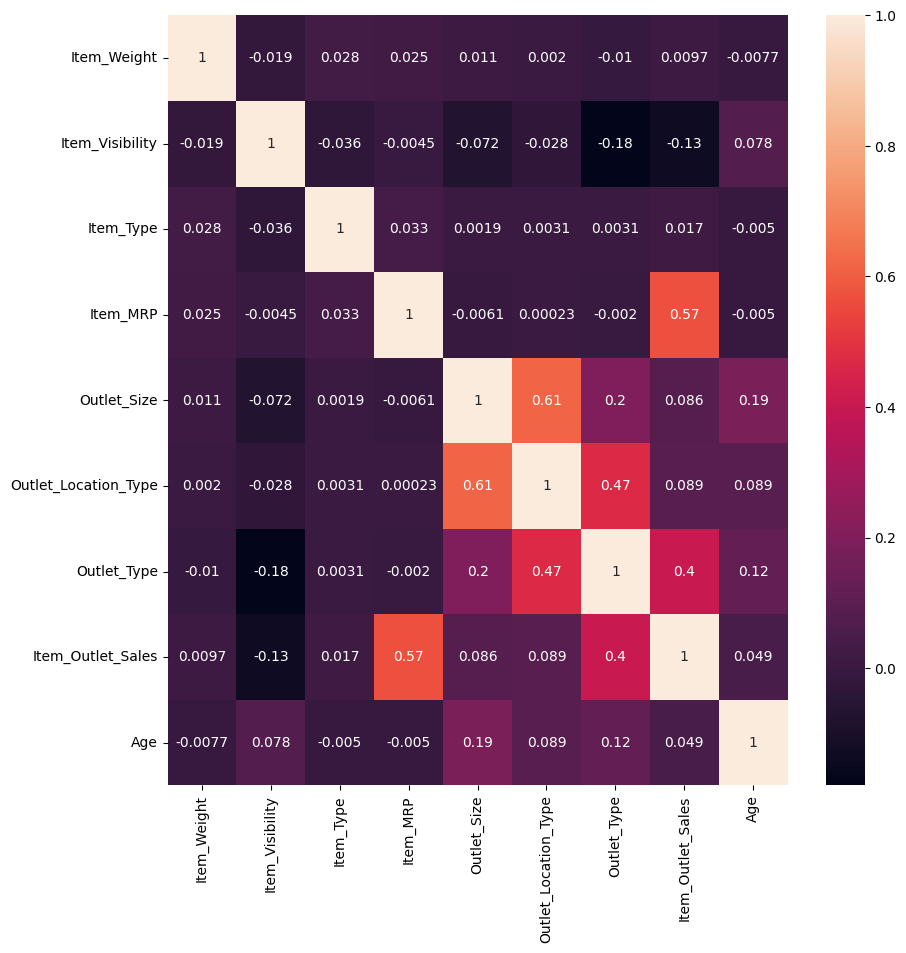

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot = True)
plt.show()

In [13]:
display(df1.head())
display(df2.head())

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,-0.831187,-1.092518,4,1.747454,1,0,1,3735.1380,-0.139541
1,-1.630810,-1.026432,14,-1.489023,1,2,2,443.4228,-1.334103
2,1.108727,-1.077939,10,0.010040,1,0,1,2097.2700,-0.139541
3,1.510904,-0.317641,6,0.660050,1,2,0,732.3800,-0.020085
4,-0.918719,-0.317641,9,-1.399220,2,2,1,994.7052,1.293934


,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age
0,1.877595,-1.266019,13,-0.532035,1,0,1,-0.139541
1,-1.067761,-0.634747,4,-0.861920,1,1,1,-1.095190
2,0.422660,0.615966,11,1.618094,1,2,0,-0.020085
3,-1.300788,-1.105995,13,0.225484,1,1,1,-1.095190
4,-0.050490,1.005093,4,1.497272,1,2,3,1.532846


<Axes: ylabel='Frequency'>

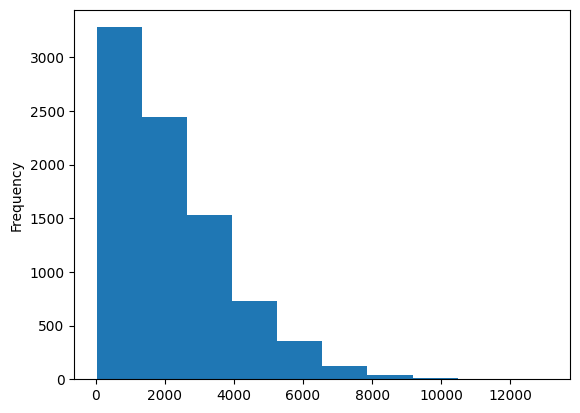

In [14]:
df1['Item_Outlet_Sales'].plot(kind = 'hist')

## Feature Encoding Reference

**Numerical:** Age = 2025 - Outlet_Establishment_Year

**Outlet_Size:** Small = 0, Medium = 1, High = 2

**Outlet_Location_Type:** Tier 1 = 0, Tier 2 = 1, Tier 3 = 2

**Outlet_Type:** Grocery Store = 0, Supermarket Type1 = 1, Supermarket Type2 = 2, Supermarket Type3 = 3

**Item_Type (Label Encoded):**
0=Baking Goods, 1=Breads, 2=Breakfast, 3=Canned, 4=Dairy, 5=Frozen Foods, 6=Fruits and Vegetables, 7=Hard Drinks, 8=Health and Hygiene, 9=Household, 10=Meat, 11=Others, 12=Seafood, 13=Snack Foods, 14=Soft Drinks, 15=Starchy Foods

**Scaled Features (StandardScaler):** Item_Weight, Item_Visibility, Item_MRP, Age

In [15]:
X = df1.drop(columns = 'Item_Outlet_Sales')
y = np.log1p(df1['Item_Outlet_Sales'])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state= 2)
X_test = df2


In [ ]:
models = {
    'LinearRegression' : {
        'model': LinearRegression(),
        'params':{}
    },
    'Ridge' : {
        'model': Ridge(),
        'params':{
            'alpha': [0.1, 1.0, 10.0, 100.0]
        }
    },
    'Lasso': {
        'model': Lasso(random_state= 2),
        'params': {
            'alpha': [0.1, 1.0, 10.0, 100.0]
        }
    },
    'Random Forest' : {
        'model': RandomForestRegressor(random_state = 2),
        'params':{
            'max_depth': [None, 10, 15, 20],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 4],
            'n_estimators': [50, 100, 200],
            'max_features': [None, 'sqrt', 0.8]
        }
    },
    'XGBRegressor' : {
        'model': XGBRegressor(random_state = 2),
        'params':{
            'max_depth': [3, 5, 6, 8],
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'n_estimators': [50, 100, 200],
            'subsample': [0.8, 0.9, 1.0],
            'colsample_bytree': [0.8, 0.9, 1.0]
        }
    },
    'SVM': {
        'model': SVR(),
        'params':{
             'C': [0.1, 1, 10, 100],
            'kernel': ['rbf', 'linear'],
            'gamma': ['scale', 'auto', 0.001, 0.01]
        }
    }
}

In [17]:
results = {}
all_models = {}

for name, config in models.items():
    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv = 5,
        scoring = 'neg_mean_absolute_error',
        n_jobs = -1,
        verbose = 1
    )

    grid_search.fit(X_train, y_train)
    all_models[name] = grid_search.best_estimator_

    train_pred = grid_search.best_estimator_.predict(X_train)
    val_pred = grid_search.best_estimator_.predict(X_val)

    results[name] = {
        'best_model' : grid_search.best_estimator_,
        'best_params' : grid_search.best_params_,
        'Train R2': r2_score(y_train, train_pred),
        'Val R2': r2_score(y_val, val_pred),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, train_pred)),
        'Val RMSE' : np.sqrt(mean_squared_error(y_val, val_pred))
    }

    best_model_name = max(results.keys(), key = lambda x: results[x]['Val R2'])
    model = results[best_model_name]['best_model']

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [18]:
summary_data = []

for name, result in results.items():
    summary_data.append({
        'Model': name,
        'Val R2': result['Val R2'],
        'Val RMSE': result['Val RMSE'],
        'Overfit Gap': result['Train R2'] - result['Val R2']
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('Val R2', ascending = False)
summary_df = summary_df.round(4)
display(summary_df)

,Model,Val R2,Val RMSE,Overfit Gap
4,XGBRegressor,0.7309,0.5229,0.0188
5,SVM,0.7299,0.5238,0.0134
3,Random Forest,0.7227,0.5308,0.0696
1,Ridge,0.5765,0.6558,0.0114
0,LinearRegression,0.5765,0.6558,0.0114
2,Lasso,0.4695,0.7341,0.0076


In [ ]:
best_model = results['XGBRegressor']['best_model']
test_pred_log = best_model.predict(X_test)
test_predictions = np.expm1(test_pred_log)

submission = pd.DataFrame({
    'Item_Identifier': df2_test['Item_Identifier'],
    'Outlet_Identifier': df2_test['Outlet_Identifier'],
    'Item_Outlet_Sales': test_predictions
})

print(submission.head())
print(f"\nPredictions range: ${test_predictions.min():.2f} to ${test_predictions.max():.2f}")
print(f"Mean predicted sales: ${test_predictions.mean():.2f}")

submission.to_csv('bigmart_predictions.csv', index=False)

  Item_Identifier Outlet_Identifier  Item_Outlet_Sales
0           FDW58            OUT049        1434.976562
1           FDW14            OUT017        1308.040405
2           NCN55            OUT010         484.857330
3           FDQ58            OUT017        2234.642822
4           FDY38            OUT027        5419.241211

Predictions range: $55.92 to $5470.75
Mean predicted sales: $1926.82


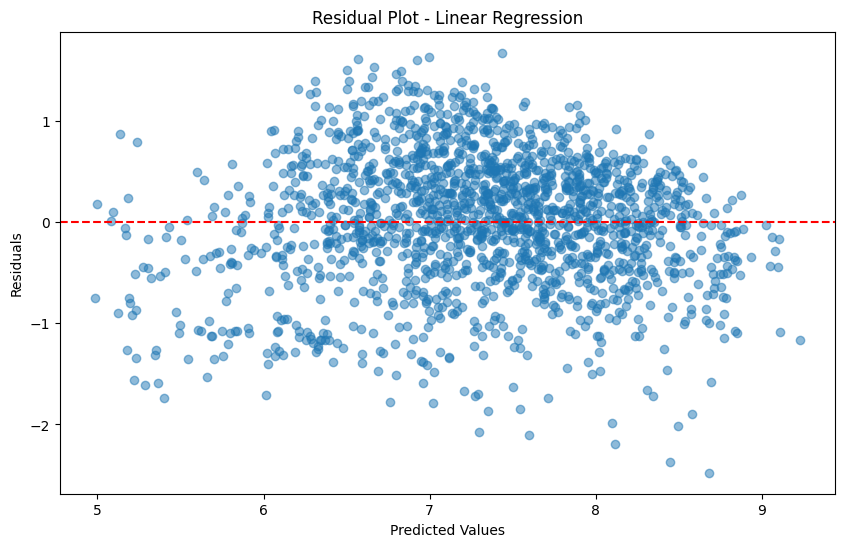

In [19]:
# Fit a linear model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

# Plot residuals
residuals = y_val - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Linear Regression')
plt.show()

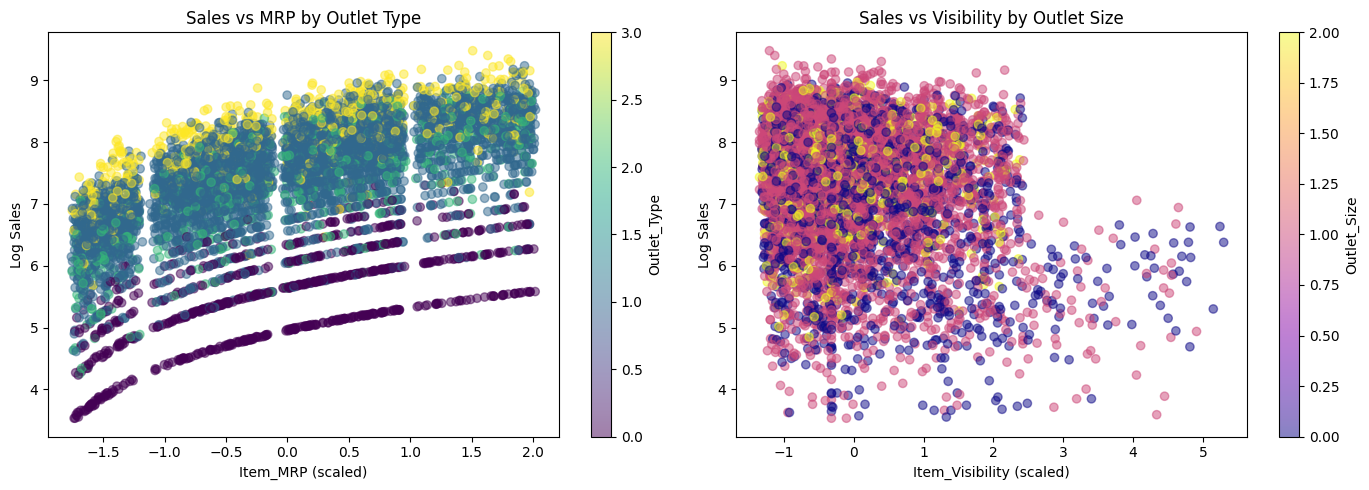

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot Item_MRP vs Sales, colored by Outlet_Type
scatter1 = axes[0].scatter(X_train['Item_MRP'], y_train, c=X_train['Outlet_Type'], alpha=0.5, cmap='viridis')
axes[0].set_xlabel('Item_MRP (scaled)')
axes[0].set_ylabel('Log Sales')
axes[0].set_title('Sales vs MRP by Outlet Type')
plt.colorbar(scatter1, ax=axes[0], label='Outlet_Type')

# Similar for another feature
scatter2 = axes[1].scatter(X_train['Item_Visibility'], y_train, c=X_train['Outlet_Size'], alpha=0.5, cmap='plasma')
axes[1].set_xlabel('Item_Visibility (scaled)')
axes[1].set_ylabel('Log Sales')
axes[1].set_title('Sales vs Visibility by Outlet Size')
plt.colorbar(scatter2, ax=axes[1], label='Outlet_Size')

plt.tight_layout()
plt.show()

                feature  importance
6           Outlet_Type    0.732858
3              Item_MRP    0.208399
1       Item_Visibility    0.017312
7                   Age    0.014677
5  Outlet_Location_Type    0.011897
0           Item_Weight    0.005750
4           Outlet_Size    0.005183
2             Item_Type    0.003925


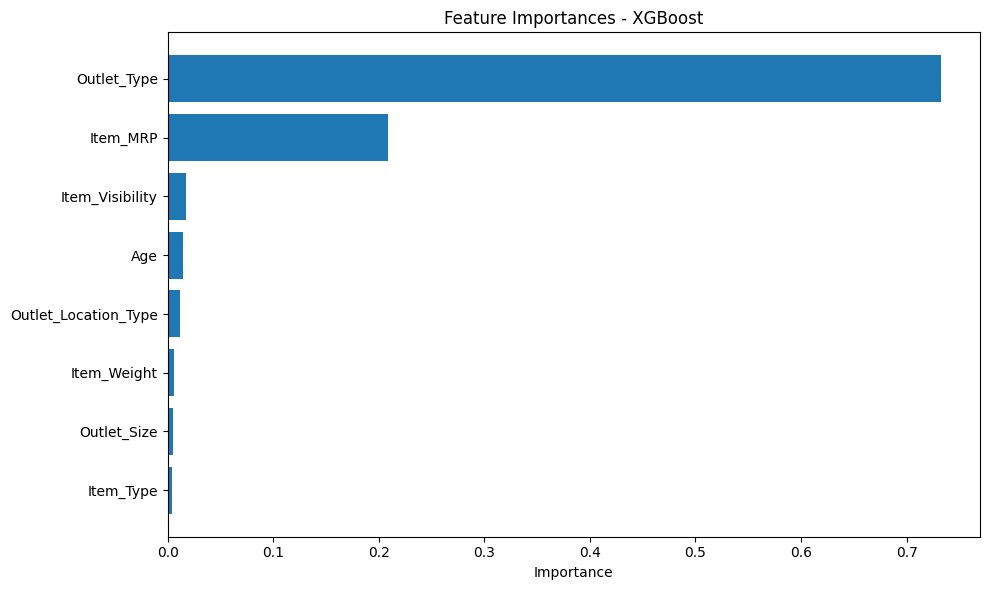

In [21]:
# Get the XGBoost or RandomForest model from your results
xgb_model = results['XGBRegressor']['best_model']
# or
rf_model = results['Random Forest']['best_model']

# Check feature importances
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print(importances)

# Visualize it
plt.figure(figsize=(10, 6))
plt.barh(importances['feature'], importances['importance'])
plt.xlabel('Importance')
plt.title('Feature Importances - XGBoost')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()